$$\textbf{Blatt 04 - Praktische Optimierung - Adrian Lentz, Robert}$$

Lösungen und Erklärungen für Blatt 05. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

$$\textbf{Aufgabe 4.2}$$


In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.distributions.empirical_distribution as edf
from scipy.stats import multivariate_normal

In [2]:
#Funktion definieren
def f_a(x):
    return 1.5*x[0]**2 + x[1]**2 + 21*np.sin(x[0])*np.cos(x[1]) + 0.5*((abs(x[0]))**2 + (abs(x[1]))**2)

In [3]:
#Implementiere Threshold Accepting
def TA(f,d,X):
    Z=multivariate_normal(np.zeros(d), np.identity(d))
    T0=1
    for x in range(20):
        Y=X+Z.rvs()
        fY=f(Y)
        fX=f(X)
        if fY<fX+T0:
            X=Y
        T0=T0*0.5
    return X

In [4]:
#Implementiere Simulated Annealing
def SA(f,d,X):
    Z=multivariate_normal(np.zeros(d), np.identity(d))
    T0=1
    for x in range(20):
        Y=X+Z.rvs()
        fY=f(Y)
        fX=f(X)
        if fY<fX:
            X=Y
        if fY>fX:
            if np.random.uniform(0,1) < np.exp((fX-fY)/T0):
                X=Y
        T0=T0*0.5
    return X

In [5]:
TAtraj=[]
TAval=[]
for x in range(20):
    result=TA(f_a,2,[5,5])
    TAtraj.append(result)     #Fülle Liste mit Ergebnissen
    TAval.append(f_a(result)) #Fülle Liste mit allen Funktionswerten
#np.median(TAtraj)
#np.mean(TAtraj)
#np.std(TAtraj)

In [6]:
SAtraj=[]
SAval=[]
for x in range(20):
    result=SA(f_a,2,[5,5])
    SAtraj.append(result)     #Fülle Liste mit Ergebnissen
    SAval.append(f_a(result)) #Fülle Liste mit allen Funktionswerten
#np.median(SAtraj)
#np.mean(SAtraj)
#np.std(SAtraj)

[Text(0.5, 0, 'Optimierung'), Text(0, 0.5, 'Funktionswerte')]

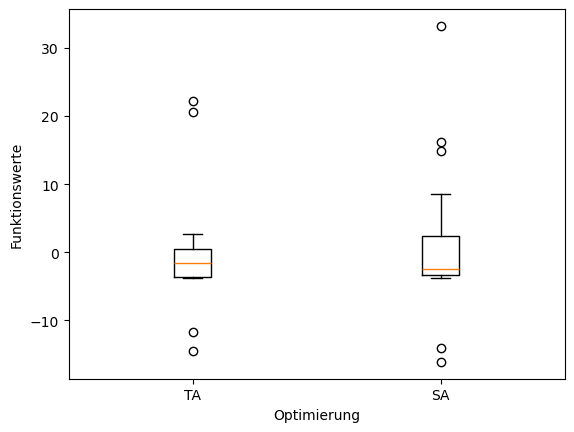

In [7]:
fig, ax = plt.subplots()
ax.boxplot([TAval,SAval])
ax.set_xticklabels(['TA','SA'])
ax.set(xlabel='Optimierung', ylabel='Funktionswerte')

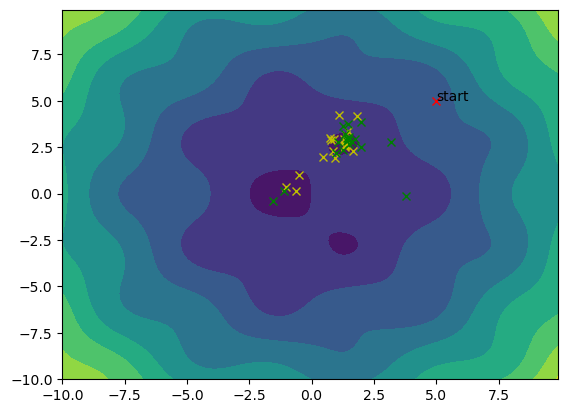

In [8]:
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = [x, y]
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, f_a(pos))
ax2.plot(5,5,"rx")
ax2.text(5,5,"start")
for x in TAtraj:
    ax2.plot(x[0],x[1],"yx")             #TA Werte werden in Gelb markiert
for x in SAtraj:
    ax2.plot(x[0],x[1],"gx")             #SA Werte werden in Grün markiert

Wie man in dem obigen Bild und dem Boxplot sieht, sind SA und TA ungefähr gleich variant. Beide Varianten finden meistens den lokalen Tiefpunkt in der Nähe des Startpunkts. Sowohl SA und TA produzieren Ausreißer, die dem globalen Optimum nahe kommen, Jedoch hat SA nach oben die stärkeren Ausreißer.
Insgesamt sind beide Varianten sehr ähnlich, und beide Möglichkeiten, lokale Optima zu überwinden scheinen zu funktionieren. Um wirklich große Unterschiede feststellen zu können müsste die Stichprobengröße wahrscheinlich deutlich höher sein. Dies ist bei häufigerer Ausführung des Codes aufgefallen, da teilweise SA bessere Ergebnisse geliefert hatte und teilweise TA, jedoch ohne ein klares Schema feststellen zu können.